## Comparitive Analysis
In this, the keyword extractor from the main pipline is reused on a different dataset

In [2]:
import pandas as pd
import numpy as np

### Read Product Data

In [3]:
file_path = "resources/amazon_aspect_labeled_products.tsv"
labelled_data = pd.read_csv(file_path)
labelled_data.drop(labelled_data.columns[0], axis=1, inplace=True)
labelled_data

,asin,description,title,h_label,s_label,en_label,ec_label
0,B000B5H26O,['Yorkshire Tea never compromise on the qualit...,"Taylors of Harrogate Yorkshire Gold Tea, 160 T...",0,1,0,0
1,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0
2,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0
3,B001E5DXY0,['We choose teas from our three favorite origi...,Taylors of Harrogate Yorkshire Gold Loose Leaf...,0,1,0,0
4,B004G90QE6,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 240 Teabags",0,1,0,0
...,...,...,...,...,...,...,...
9043,B01CMYK8W6,['What happens over the course of 18 months? W...,Tillamook Extra Sharp White Cheddar Cheese Age...,1,1,0,0
9044,B01DJXXR4U,"['Four simple, natural ingredients including o...",Tillamook Special Reserve Extra Sharp Cheddar ...,1,1,0,0
9045,B01FIV3SG8,['Tillamook Medium Cheddar Thick Sliced Cheese...,Tillamook Medium Cheddar Thick Sliced Cheese 1...,0,1,0,0
9046,B01FJFO2S6,['Tillamook Country Smoker Big Dad beef sticks...,Tillamook Country Smoker Big Dad Beef Stick 20...,0,1,1,0


### Data Pre-Processing

In [4]:
import import_ipynb
from ProjectModules import ColumnDropper, RowDropper, StringCleaner
from sklearn.pipeline import Pipeline

importing Jupyter notebook from ProjectModules.ipynb


In [5]:
print(f"Number of columns: {labelled_data.shape[1]} | Number of records= {labelled_data.shape[0]}")
print(f"Columns in labelled amazon dataset: {list(labelled_data.columns)}")

Number of columns: 7 | Number of records= 9048
Columns in labelled amazon dataset: ['asin', 'description', 'title', 'h_label', 's_label', 'en_label', 'ec_label']


In [6]:
labelled_data["clean_description"] = labelled_data["description"]
labelled_data_preprocess_pipeline = Pipeline([
    ("clean_string", StringCleaner(columns=['clean_description'])),
    ("drop_rows", RowDropper(columns=['clean_description']))
])
labelled_data = labelled_data_preprocess_pipeline.fit_transform(labelled_data)
print(f"Number of columns: {labelled_data.shape[1]} | Number of records= {labelled_data.shape[0]}")
print(f"Columns in amazon dataset: {list(labelled_data.columns)}")
labelled_data.head(2)

Number of columns: 8 | Number of records= 7963
Columns in amazon dataset: ['asin', 'description', 'title', 'h_label', 's_label', 'en_label', 'ec_label', 'clean_description']


,asin,description,title,h_label,s_label,en_label,ec_label,clean_description
0,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0,we choose teas from our three favorite origins...
1,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0,made with a blend of teas from assam africa an...


### Keyword Extraction

In [7]:
import pickle

In [8]:
# Load existing keyword extractor and use it is compute TF-IDF scores
keyword_extractor = pickle.load(open("resources/saved_objects/keyword_extractor", "rb"))
product_tfidf = keyword_extractor.compute_tfidf(labelled_data["clean_description"])
product_tfidf = keyword_extractor.eliminate_redundant_bigram()

### Keyword Mapper

In [9]:
keyword_mapper = pickle.load(open('resources/saved_objects/keyword_mapper', 'rb'))
keyword_mapper.product_tfidf = keyword_extractor.product_tfidf
keyword_mapper.onto_tfidf = keyword_extractor.ontology_tf
keyword_mapper.map_keywords()

,product_idx,onto_idx,imp_score
0,0,180,1.0
1,7,84,1.0
2,7,83,1.0
3,7,82,1.0
4,7,81,1.0
...,...,...,...
15337,7944,240,1.0
15338,7944,239,1.0
15339,7944,238,1.0
15340,7944,237,1.0


### Integrate and Aggregate Data

In [10]:
keyword_mapper.integrate_ontology(keyword_mapper.ontology_data)

,product_idx,onto_idx,imp_score,tag,preference,preference category,association,conditional,association_imp_score
0,0,180,1.0,high in antioxidant,Products rich in antioxidants,Health,1,False,1.0
1,7,84,1.0,contain milk,Vegan products,Health,-1,True,-1.0
2,7,83,1.0,contain milk,Products from companies that support animal ri...,Social,-1,False,-1.0
3,7,82,1.0,contain milk,Lactose-free products,Health,-1,True,-1.0
4,7,81,1.0,contain milk,Allergen-free products,Health,-1,True,-1.0
...,...,...,...,...,...,...,...,...,...
15337,7944,240,1.0,no milk,Vegan products,Health,1,True,1.0
15338,7944,239,1.0,no milk,Products from companies that support animal ri...,Social,1,False,1.0
15339,7944,238,1.0,no milk,Lactose-free products,Health,1,True,1.0
15340,7944,237,1.0,no milk,Allergen-free products,Health,1,True,1.0


In [11]:
final_mapping = keyword_mapper.aggregate_mapping(by="preference category", conditional=False)
final_mapping.columns = [i[1] for i in final_mapping.columns]
final_mapping

,Environment,Health,Quality,Social
product_idx,,,,
0,NaN,1.000000,NaN,NaN
7,NaN,NaN,NaN,-1.000000
14,NaN,1.000000,NaN,NaN
21,NaN,0.185802,NaN,-0.395994
23,0.800763,0.800763,NaN,0.334182
...,...,...,...,...
7918,NaN,0.794614,0.303557,NaN
7927,NaN,0.563403,NaN,NaN
7928,NaN,NaN,NaN,-1.000000


In [12]:
final_mapping[final_mapping.count(axis=1)>1].head(15)

,Environment,Health,Quality,Social
product_idx,,,,
21,NaN,0.185802,NaN,-0.395994
23,0.800763,0.800763,NaN,0.334182
24,0.204943,0.340762,0.122738,NaN
26,0.480286,0.447936,NaN,0.267137
27,0.441434,0.441434,NaN,0.441434
28,0.441434,0.441434,NaN,0.441434
30,0.170049,0.211354,0.087571,0.295493
34,0.170049,0.211354,0.087571,0.295493
35,0.441434,0.441434,NaN,0.441434


In [13]:
vocabulary = pd.DataFrame()
vocabulary["keywords"] = keyword_extractor.get_vocab()
keywords = product_tfidf.tocsr().nonzero()
product_keywords = pd.DataFrame()
product_keywords["product_idx"]=keywords[0]
product_keywords["vocab_idx"]=keywords[1]
labelled_data = labelled_data.merge(product_keywords.merge(vocabulary, 
                                           left_on="vocab_idx", 
                                           right_index=True, 
                                           how="left").groupby(by="product_idx").agg({'keywords':', '.join}), left_index=True, right_index=True, how="left")
labelled_data

,asin,description,title,h_label,s_label,en_label,ec_label,clean_description,keywords
0,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0,we choose teas from our three favorite origins...,high antioxidant
1,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0,made with a blend of teas from assam africa an...,NaN
2,B001E5DXY0,['We choose teas from our three favorite origi...,Taylors of Harrogate Yorkshire Gold Loose Leaf...,0,1,0,0,we choose teas from our three favorite origins...,NaN
3,B004G90QE6,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 240 Teabags",0,1,0,0,made with a blend of teas from assam africa an...,NaN
4,B004M31ZR8,"[""480 Yorkshire Tea 1 Cup Tea Bags. Why do peo...",Taylors of Harrogate Yorkshire Tea 480 Count,1,1,0,0,yorkshire tea cup tea bags why do people love ...,NaN
...,...,...,...,...,...,...,...,...,...
7958,B01CMYK8W6,['What happens over the course of 18 months? W...,Tillamook Extra Sharp White Cheddar Cheese Age...,1,1,0,0,what happens over the course of months well le...,NaN
7959,B01DJXXR4U,"['Four simple, natural ingredients including o...",Tillamook Special Reserve Extra Sharp Cheddar ...,1,1,0,0,four simple natural ingredients including our ...,high quality
7960,B01FIV3SG8,['Tillamook Medium Cheddar Thick Sliced Cheese...,Tillamook Medium Cheddar Thick Sliced Cheese 1...,0,1,0,0,tillamook medium cheddar thick sliced cheese o...,NaN
7961,B01FJFO2S6,['Tillamook Country Smoker Big Dad beef sticks...,Tillamook Country Smoker Big Dad Beef Stick 20...,0,1,1,0,tillamook country smoker big dad beef sticks a...,NaN


In [14]:
integrated_data = labelled_data.merge(final_mapping, left_index=True, right_index=True)
integrated_data

,asin,description,title,h_label,s_label,en_label,ec_label,clean_description,keywords,Environment,Health,Quality,Social
0,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0,we choose teas from our three favorite origins...,high antioxidant,NaN,1.000000,NaN,NaN
7,B006Q99SP2,['Lion Brand Midget Gem Gums (packed in 500g p...,Lions Midget Gums Sweets 500g Bag (1/4 Kilo),0,1,0,0,lion brand midget gem gums packed in g poly ba...,contain milk,NaN,NaN,NaN,-1.000000
14,B00IW5LQRQ,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 40 Teabags",1,1,0,0,made with a blend of teas from assam africa an...,rich antioxidant,NaN,1.000000,NaN,NaN
21,B000VKA1D0,"['Bio Nature Organic Pasta, Spaghetti, 16 Ounc...","Bionaturae Organic Pasta, Spaghetti, 16 Oz",0,1,0,0,bio nature organic pasta spaghetti ounces alle...,"contain egg, contain product, egg product",NaN,0.185802,NaN,-0.395994
23,B000WDP2B2,"['Bionaturae Organic Egg Tagliatelle, 8.8 Ounc...","Bionaturae Organic Egg Tagliatelle, 8.8 oz",0,1,0,0,bionaturae organic egg tagliatelle ounces cont...,"contain egg, egg organic",0.800763,0.800763,NaN,0.334182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,B00D3RKTZS,"[""The Tillamook Country Smoker Pepper Stick in...",Tillamook Country Smoker Pepper Sticks 1lb Jar...,0,1,1,0,the tillamook country smoker pepper stick in a...,"high protein, high quality",NaN,0.794614,0.303557,NaN
7927,B00NZNQLTS,['Tillamook Country Smoker Beef Jerky has a 50...,Tillamook Country Smoker All Natural Beef Jerk...,1,1,0,0,tillamook country smoker beef jerky has a year...,"low fat, natural flavor, no preservative",NaN,0.563403,NaN,NaN
7928,B00ONCSQ2A,"[""World's Best Medium Cheddar Cheese - 2010 Wo...","Tillamook Medium Cheddar Cheese, 8 oz",1,1,0,0,world s best medium cheddar cheese world champ...,contain milk,NaN,NaN,NaN,-1.000000
7944,B00YMASLXM,['The rich cheddar cheese is aged for more tha...,Tillamook Medium Cheddar Cheese &amp; Sharp Ch...,0,1,0,0,the rich cheddar cheese is aged for more than ...,no milk,NaN,NaN,NaN,1.000000


### Prepare Data for Comparison

In [15]:
# Transforming scores into label (-1,0,1)
for col in ["Environment", "Health", "Quality", "Social"]:
    integrated_data[col+"_label"] = integrated_data[col].apply(lambda x: 1 if x>0 else -1 if x<0 else 0).astype(int)
integrated_data

,asin,description,title,h_label,s_label,en_label,ec_label,clean_description,keywords,Environment,Health,Quality,Social,Environment_label,Health_label,Quality_label,Social_label
0,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0,we choose teas from our three favorite origins...,high antioxidant,NaN,1.000000,NaN,NaN,0,1,0,0
7,B006Q99SP2,['Lion Brand Midget Gem Gums (packed in 500g p...,Lions Midget Gums Sweets 500g Bag (1/4 Kilo),0,1,0,0,lion brand midget gem gums packed in g poly ba...,contain milk,NaN,NaN,NaN,-1.000000,0,0,0,-1
14,B00IW5LQRQ,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 40 Teabags",1,1,0,0,made with a blend of teas from assam africa an...,rich antioxidant,NaN,1.000000,NaN,NaN,0,1,0,0
21,B000VKA1D0,"['Bio Nature Organic Pasta, Spaghetti, 16 Ounc...","Bionaturae Organic Pasta, Spaghetti, 16 Oz",0,1,0,0,bio nature organic pasta spaghetti ounces alle...,"contain egg, contain product, egg product",NaN,0.185802,NaN,-0.395994,0,1,0,-1
23,B000WDP2B2,"['Bionaturae Organic Egg Tagliatelle, 8.8 Ounc...","Bionaturae Organic Egg Tagliatelle, 8.8 oz",0,1,0,0,bionaturae organic egg tagliatelle ounces cont...,"contain egg, egg organic",0.800763,0.800763,NaN,0.334182,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,B00D3RKTZS,"[""The Tillamook Country Smoker Pepper Stick in...",Tillamook Country Smoker Pepper Sticks 1lb Jar...,0,1,1,0,the tillamook country smoker pepper stick in a...,"high protein, high quality",NaN,0.794614,0.303557,NaN,0,1,1,0
7927,B00NZNQLTS,['Tillamook Country Smoker Beef Jerky has a 50...,Tillamook Country Smoker All Natural Beef Jerk...,1,1,0,0,tillamook country smoker beef jerky has a year...,"low fat, natural flavor, no preservative",NaN,0.563403,NaN,NaN,0,1,0,0
7928,B00ONCSQ2A,"[""World's Best Medium Cheddar Cheese - 2010 Wo...","Tillamook Medium Cheddar Cheese, 8 oz",1,1,0,0,world s best medium cheddar cheese world champ...,contain milk,NaN,NaN,NaN,-1.000000,0,0,0,-1
7944,B00YMASLXM,['The rich cheddar cheese is aged for more tha...,Tillamook Medium Cheddar Cheese &amp; Sharp Ch...,0,1,0,0,the rich cheddar cheese is aged for more than ...,no milk,NaN,NaN,NaN,1.000000,0,0,0,1


#### Creating a sample for evaluation

This data will consists of 10 products for each of the categories and 10 products which was not mapped to any of the sustainability factor.

In [18]:
sample_ids = []
for col in ['Quality_label', 'Social_label','Environment_label', 'Health_label']:
    temp = integrated_data[integrated_data[col]!=0].index
    samples = integrated_data.loc[temp[~temp.isin(sample_ids)]].sample(n=10)
    sample_ids = np.concatenate([sample_ids, samples.index])

In [21]:
sample_for_evaluation = integrated_data.loc[sample_ids]
sample_for_evaluation

,asin,description,title,h_label,s_label,en_label,ec_label,clean_description,keywords,Environment,Health,Quality,Social,Environment_label,Health_label,Quality_label,Social_label
4553,B013P14ONE,['Cadbury Bournville Cocoa is made from the sa...,Cadbury Bournville Cocoa - 125g,1,1,0,0,cadbury bournville cocoa is made from the same...,"high quality, suitable vegetarian",NaN,NaN,0.293353,NaN,0,0,1,0
5193,B00F1AEF8W,['From its humble beginnings in 1877 as a smal...,"Barilla Pasta Sauce, Mushroom, 24 oz",0,1,0,0,from its humble beginnings in as a small shop ...,"high quality, natural flavor",NaN,0.534833,0.422479,NaN,0,1,1,0
5158,B00338DSQ4,['From its humble beginnings in 1877 as a smal...,"Barilla Spaghetti Pasta, 32 Ounce (Pack of 6)",0,1,0,0,from its humble beginnings in as a small shop ...,high quality,NaN,NaN,0.500000,NaN,0,0,1,0
95,B0062Y6IXQ,"['', ""Biona Organics is committed to producing...",Biona Organic - Hazelnut Butter - 170g (Pack o...,1,1,0,1,biona organics is committed to producing great...,"gmo free, high quality, no artificial additive...",0.170049,0.211354,0.087571,0.295493,1,1,1,1
6783,B000FFIL60,['The most tender green tea leaves are hand ro...,"Numi Organic Tea Jasmine Pearls, 16 Ounce Bulk...",1,1,1,0,the most tender green tea leaves are hand roll...,"fair trade certified, high quality, non gmo, o...",0.318528,0.320241,0.128514,0.184947,1,1,1,1
537,B001IZIBNY,"[""We're Simply Organic. Our goal is to enrich ...",Simply Organic Ginger Root Ground Certified Or...,1,1,0,0,we re simply organic our goal is to enrich peo...,"certified organic, certified quality, organic ...",0.511655,0.511655,0.682473,0.438686,1,1,1,1
5444,B000QV1PR0,['Spectrum Culinary Organic Canola Oil has a n...,"Spectrum Culinary Organic Canola Oil, 16 fl. oz.",1,1,1,0,spectrum culinary organic canola oil has a neu...,"certified organic, gmo verified, high quality,...",0.254227,0.227998,0.154369,0.273017,1,1,1,1
2243,B01EUIIULS,"['Easily brew crisp, refreshing Lipton black i...","Lipton Family-Sized Black Iced Tea Bags, Decaf...",1,1,0,1,easily brew crisp refreshing lipton black iced...,"high quality, sustainably sourced",0.435541,NaN,0.245569,NaN,1,0,1,0
6318,B00RDJQDRA,['3V Fresh mixes are made with premium fruit p...,3V Fresh&trade; Coconut Cream Smoothie Mix (1 ...,1,1,0,0,v fresh mixes are made with premium fruit pure...,"artificial color, artificial flavor, fresh mad...",0.293550,-0.028366,0.457737,0.293550,1,-1,1,1
2148,B00N2FV6OE,['Unlock the energy with new Lipton Natural En...,Lipton Natural Energy Black Tea Keurig 2.0 K-C...,1,1,0,0,unlock the energy with new lipton natural ener...,high quality,NaN,NaN,0.500000,NaN,0,0,1,0


In [22]:
sample_for_evaluation[["asin", "description", "keywords",'Environment', 'Health',
       'Quality', 'Social', 'Environment_label', 'Health_label',
       'Quality_label', 'Social_label']].sample(5)

,asin,description,keywords,Environment,Health,Quality,Social,Environment_label,Health_label,Quality_label,Social_label
6144,B0053O8OF6,['Sweet Moose ClassicCocoa Cream hot chocolate...,"certified organic, fair trade, use cocoa",0.017950,0.416252,NaN,0.290836,1,1,0,1
6625,B004HHH20I,['Theo Chocolate is proud to be the only Organ...,"certified organic, contain egg, contain milk, ...",0.366259,0.366259,NaN,0.120268,1,1,0,1
5933,B000EMK4IC,"['8 Flour Tortillas, Rice and Beans & Seasonin...",contain milk,NaN,NaN,NaN,-1.000000,0,0,0,-1
2905,B00AQFGL4S,"['Nutiva USDA Certified Organic, non-GMO, Glut...","certified organic, fair trade, gluten free, gm...",0.270058,0.272032,NaN,0.233368,1,1,0,1
520,B000WS3AJ8,"['A must for Mexican and African cooking, chil...","egg product, high quality, milk product, natur...",0.311463,0.251119,0.115304,0.020890,1,1,1,1


In [23]:
sample_for_evaluation = pd.concat([sample_for_evaluation, labelled_data[~labelled_data.index.isin(integrated_data.index)].sample(n=10)[['asin', 'description', 'title', 'h_label', 's_label', 'en_label',
       'ec_label', "clean_description", 'keywords']]])

In [77]:
sample_for_evaluation.to_excel("resources/output/sample_for_evaluation.xlsx") # This sheet was shared for manual evaluation by Alaa

#### Comparitive analysis of health, environment and social sustainability labels

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt

In [28]:
# Here the first field is a generic name for the factor, 
# second string the name of the field containing expected value
# third string is the name of the column with actual value generated in the prohect
cmp_labels = [("health", 'h_label', "Health_label"), ("environment", "en_label", "Environment_label"), ("social", "s_label", "Social_label")]
cnfm = {}
metrics = pd.DataFrame()
for cmp in cmp_labels:
    # Create confusion matrix
    cnfm[cmp[0]] = confusion_matrix(integrated_data[cmp[1]], integrated_data[cmp[2]])
    metrics[cmp[0]] = [accuracy_score(integrated_data[cmp[1]], integrated_data[cmp[2]]),
                      f1_score(integrated_data[cmp[1]], integrated_data[cmp[2]], average="weighted"),
                      precision_score(integrated_data[cmp[1]], integrated_data[cmp[2]], average="weighted")]

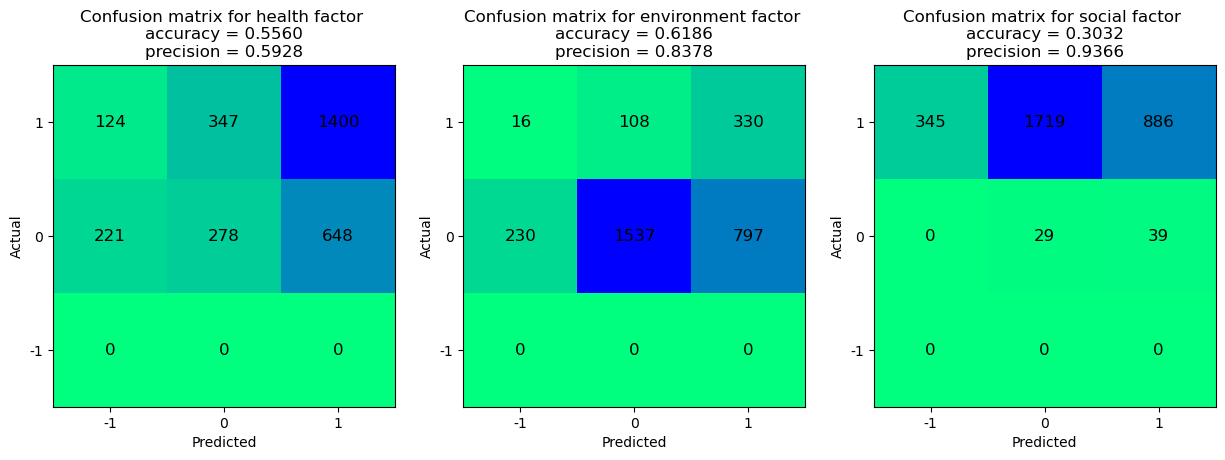

In [29]:
# Visualizing the confusion matrix
fig, axs = plt.subplots(1,3, figsize=(15,15))
for ax_i, label in enumerate(cmp_labels):
    axs[ax_i].imshow(cnfm[label[0]], cmap='winter_r')
    axs[ax_i].set_ylabel("Actual")
    axs[ax_i].set_xlabel("Predicted")
    axs[ax_i].set_xticks(np.arange(3))
    axs[ax_i].set_yticks(np.arange(3))
    axs[ax_i].set_xticklabels(np.arange(-1,2))
    axs[ax_i].set_yticklabels(np.arange(-1,2))
    axs[ax_i].invert_yaxis()
    axs[ax_i].set_title(f"Confusion matrix for {label[0]} factor \naccuracy = {metrics[label[0]].iloc[0]:0.4f}\nprecision = {metrics[label[0]].iloc[2]:0.4f}")
    for i in range(3):
        for j in range(3):
            axs[ax_i].text(j, i, str(cnfm[label[0]][i][j]), va='center', ha='center', fontsize="large")

In [30]:
metrics.index=["accuracy","f1","precision"]
metrics

,health,environment,social
accuracy,0.555997,0.618622,0.303181
f1,0.562181,0.683273,0.447707
precision,0.592839,0.837840,0.936630
